# 松山湖 Workshop
#### 本文件主要参考自 [http://workshop.materialsproject.org/pymatgen/core/pymatgen_core.ipynb](http://workshop.materialsproject.org/pymatgen/core/pymatgen_core.ipynb)

![pymatgen logo](http://pymatgen.org/_images/pymatgen.png)

# 0. What is pymatgen?

Pymatgen (Python Materials Genomics) 是一款为 Materials Project 提供科学支持的软件包. 其包含健壮并且高效的处理晶体结构以及计算结果的函数库, 利用其内置的丰富的工具, 它可以帮助我们更好地处理材料相关的数据.

## 0.0 Core functionality

- Create, identify, and manipulate crystal structures and molecules
- <u>Write input and output files for most electronic structure codes</u>
- <u>Analyze density of states, bandstructures, X-ray diffraction spectra</u>
- Perform tensor-based analysis, including elastic and piezoelectric tensors
- Characterize the local chemical environment of structural sites
- Create pourbaix diagrams and phase diagrams
- Match crystal structures to each other and perform symmetry analysis
- Match substrates based on geometry and elastic behavior
- Create and manipulate surfaces
- Do unit conversions
- Get basic information about chemical identity
- Includes a wide variety of other analysis tools, including estimating the cost of a material based on chemical abundance, or its geographical distribution of elements


## 0.1 How do I install pymatgen?

`pymatgen` 是一款 Python 程序包, 可以通过以下两种方式进行安装使用. pymatgen 可以通过 pip:

`pip install pymatgen`

或者 conda:

`conda install --channel matsci pymatgen`

目前, 我们推荐使用 3.6 版本及以上的 Python 运行.


## 0.2 Where can I find help and how do I get involved?

* **For general help:** [pymatgen Google Groups mailing list](https://groups.google.com/forum/#!forum/pymatgen) is a place to ask questions.

* **To report bugs:** The [Github Issues](https://github.com/materialsproject/github) page is a good place to report bugs.

* **For Materials Project data and website discussions:** The Materials Project  has its community [Materials Project Discussion](https://discuss.materialsproject.org) forum. 

* **For more example notebooks:** [matgenb](http://matgenb.materialsvirtuallab.org) is a new resource of Jupyter notebooks demonstrating various pymatgen functionality.

# 1. Verify we have pymatgen installed

通过上面的命令, 我们已经将 `ptmatgen` 安装完毕. 可以通过以下命令检测是否安装成功. 如果运行无警告和报错, 则证明没有问题.

In [1]:
import pymatgen

当然, 也可以查看安装的 `pymatgen` 的版本.

In [2]:
print(pymatgen.__version__)

2019.2.4


我们也可以以下命令查看, pymatgen 安装在电脑上的哪个地方了:

In [3]:
print(pymatgen.__file__)

C:\Users\Cloudink\Anaconda3\lib\site-packages\pymatgen\__init__.py


In [4]:
# 查看 python 的版本号
import sys
print(sys.version)

3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]


如果遇到问题的话, 先检查自己使用的版本号是否为最新版本.

# 2. Structures and Molecules

在 pymatgen 里面, 主要把存储和处理的数据分为 [**`Structure`**](http://pymatgen.org/pymatgen.core.structure.html#pymatgen.core.structure.Structure) 和 [**`Molecule`**](http://pymatgen.org/pymatgen.core.structure.html#pymatgen.core.structure.Molecule) 这两类对象.

通常来说, 我们更多的使用 `Structure`. 两者之间的主要区别其实就反应在 `Stucture` 需要支持更多的周期性的要求.

创建和使用上述的两类对象的过程其实非常的简单, 我们先介绍 `Molecule` 这一类对象.


## 2.0 Creating a Molecule

首先我们需要导出必要的模块 `Molecule`:

In [5]:
from pymatgen import Molecule

如果你使用 Jupyter notebook 的话, 你可以直接点击相对应的程序, 让后使用 **Shift+Tab** 就可以输出对应的帮助文档. 在帮助里面包含了所有的关键字参数和位置参数的信息, 通常来说, 也会包含一些函数功能的说明和例子.

`Molecule` 需要输入的 **参数** 有 `species` 和 `coords`, 以及 **关键字参数** `charge`, `spin_multiplicity`, `validate_proximity` 和 `site_properties`.

**关键字参数和参数的区别.**

In [6]:
my_molecule = Molecule(['C','O'], [[0, 0, 0], [0, 0, 1.2]])

In [7]:
print(my_molecule)

Full Formula (C1 O1)
Reduced Formula: CO
Charge = 0, Spin Mult = 1
Sites (2)
0 C     0.000000     0.000000     0.000000
1 O     0.000000     0.000000     1.200000


## 2.1 What's in a Molecule? Introducing Sites, Elements and Species

In [8]:
# 获取坐标信息
print(my_molecule.cart_coords)

[[0.  0.  0. ]
 [0.  0.  1.2]]


In [9]:
# 计算质心的位置
print(my_molecule.center_of_mass)

[0.         0.         0.68544132]


如果你想看 molecule 中的所有的函数, 可以在输入 `my_molecule.` 以后按下 **Tab** 查看自动补全. 比如, 修改分子的电荷.

In [10]:
my_molecule.set_charge_and_spin(1)

In [11]:
print(my_molecule)

Full Formula (C1 O1)
Reduced Formula: CO
Charge = 1, Spin Mult = 2
Sites (2)
0 C     0.000000     0.000000     0.000000
1 O     0.000000     0.000000     1.200000


一个分子其实是有一个个原子组成的, 在 pymatgen 中, 其实就是一系列的 `Site` 对象组成的列表.

In [12]:
# obtain the total number of sites in the molecule
len(my_molecule)

2

In [13]:
# access the first site
my_molecule[0]

Site: C (0.0000, 0.0000, 0.0000)

在 `Site` 中, 其实包含了关于这个原子的所有信息.

In [14]:
# as shorthand, we assign the first site of our molecule to a new variable, site0
site0 = my_molecule[0]

In [15]:
site0.coords

array([0, 0, 0])

In [16]:
site0.specie

Element C

上面, 我们展示了这个 "碳原子", 可以同时拥有 [**`Element`**](http://pymatgen.org/pymatgen.core.periodic_table.html#pymatgen.core.periodic_table.Element), [**`Specie`**](http://pymatgen.org/pymatgen.core.periodic_table.html#pymatgen.core.periodic_table.Specie) [**`Composition`**](http://pymatgen.org/pymatgen.core.composition.html#pymatgen.core.composition.Composition) 这几个 "属性". 我们将逐一展开分析.

In [17]:
from pymatgen import Element, Specie, Composition

`Element` 就是元素周期表里面的元素

In [18]:
my_element = Element('C')

In [19]:
# Elements have properties such as atomic mass, average ionic radius and more:
my_element.average_ionic_radius

0.3

A `Specie` can contain additional information, such as oxidation state:

In [20]:
Specie('O', oxidation_state=-2)

Specie O2-

Or, for convenience:

In [21]:
Specie.from_string('O2-')

Specie O2-

`Composition` 的含义就是不同配比的元素的组合, 一般在无序的模拟里面比较常用. 

In [22]:
# For example, this a site that holds 50% Au and 50% Cu would be set as follows:
Composition({'Au': 0.5, 'Cu': 0.5})

Comp: Cu0.5 Au0.5

其实在我们创建一个 `Molecule` 以后, "分子" 的输入文件其实会被自动转化为上面三种介绍的 `Element`, `Specie` 或者 `Composition` 之一. 比如之前我们创建的 CO, 输入中的 `['C', 'O']` 参数就被自动转化成了 `[Element C, Element O]`.

## 2.2 Creating a Structure and Lattice

创建 `Structure` 和创建 `Molecule` 的过程十分类似, 只是我们需要额外指定 `Lattice`. 

In [23]:
from pymatgen import Structure, Lattice

A `Lattice` can be created in one of several ways. Such as by inputting a 3x3 matrix describing the individual lattice vectors. For example, a cubic lattice of length 5 Ångstrom:

In [24]:
my_lattice = Lattice([[5, 0, 0], [0, 5, 0], [0, 0, 5]])

In [25]:
my_lattice

Lattice
    abc : 5.0 5.0 5.0
 angles : 90.0 90.0 90.0
 volume : 125.0
      A : 5.0 0.0 0.0
      B : 0.0 5.0 0.0
      C : 0.0 0.0 5.0

我们也可以从描述晶格的一些参数出发.

In [26]:
my_lattice_2 = Lattice.from_parameters(5, 5, 5, 90, 90, 90)  # a, b, c, alpha, beta, gamma

In [27]:
my_lattice_3 = Lattice.cubic(5)

In [28]:
my_lattice == my_lattice_2 == my_lattice_3

True

Now, we can create a crystal structure very easily. Let's start with body-centered-cubic iron:

In [29]:
bcc_fe = Structure(Lattice.cubic(2.8), ["Fe", "Fe"], [[0, 0, 0], [0.5, 0.5, 0.5]])

In [30]:
print(bcc_fe)

Full Formula (Fe2)
Reduced Formula: Fe
abc   :   2.800000   2.800000   2.800000
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Fe    0    0    0
  1  Fe    0.5  0.5  0.5


Creating this `Structure` was similar to `Molecule`: we provided a list of elements and a list of positions. However, there are two key differences to `Molecule`: 

1. First is that we had to include our `Lattice` object when creating structure.
2. since we have a lattice, we can define the positions of our sites in *fractional co-ordinates* with respect to that lattice instead of Cartesian co-ordinates.

It's also possible to create an equivalent `Structure` using Cartesian co-ordinates:

In [31]:
bcc_fe_from_cart = Structure(Lattice.cubic(2.8), ["Fe", "Fe"], [[0, 0, 0], [1.4, 1.4, 1.4]],
                             coords_are_cartesian=True)

In [32]:
print(bcc_fe_from_cart)

Full Formula (Fe2)
Reduced Formula: Fe
abc   :   2.800000   2.800000   2.800000
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Fe    0    0    0
  1  Fe    0.5  0.5  0.5


We see check that both structures are equivalent:

In [33]:
bcc_fe == bcc_fe_from_cart

True

As in molecule, we can access properties of the structure, such as its volume:

In [34]:
bcc_fe.volume  # in Ångstroms^3

21.951999999999995

## 2.3 Modifying a Structure

利用之前创建的结果, 我们也可以轻而易举地将其扩展成 **超胞**.

In [35]:
bcc_fe_repeated = bcc_fe*(2,2,2)

In [36]:
bcc_fe_repeated

Structure Summary
Lattice
    abc : 5.6 5.6 5.6
 angles : 90.0 90.0 90.0
 volume : 175.61599999999996
      A : 5.6 0.0 0.0
      B : 0.0 5.6 0.0
      C : 0.0 0.0 5.6
PeriodicSite: Fe (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: Fe (0.0000, 0.0000, 2.8000) [0.0000, 0.0000, 0.5000]
PeriodicSite: Fe (0.0000, 2.8000, 0.0000) [0.0000, 0.5000, 0.0000]
PeriodicSite: Fe (0.0000, 2.8000, 2.8000) [0.0000, 0.5000, 0.5000]
PeriodicSite: Fe (2.8000, 0.0000, 0.0000) [0.5000, 0.0000, 0.0000]
PeriodicSite: Fe (2.8000, 0.0000, 2.8000) [0.5000, 0.0000, 0.5000]
PeriodicSite: Fe (2.8000, 2.8000, 0.0000) [0.5000, 0.5000, 0.0000]
PeriodicSite: Fe (2.8000, 2.8000, 2.8000) [0.5000, 0.5000, 0.5000]
PeriodicSite: Fe (1.4000, 1.4000, 1.4000) [0.2500, 0.2500, 0.2500]
PeriodicSite: Fe (1.4000, 1.4000, 4.2000) [0.2500, 0.2500, 0.7500]
PeriodicSite: Fe (1.4000, 4.2000, 1.4000) [0.2500, 0.7500, 0.2500]
PeriodicSite: Fe (1.4000, 4.2000, 4.2000) [0.2500, 0.7500, 0.7500]
PeriodicSite: Fe (4.2000, 1.

修改晶体结构的方式远不止上面介绍的这一种, 比如我们可以修改缩放的因子, 对其中的某一个或者某一些原子进行替换和取代. 在 pymatgen 中, 已经准备好了一些 **变换 (transformations)** 进行更为复杂的晶体结构修改.(creating surfaces, grain boundaries or creating ordered approximations of disordered structure.)

## 2.4 Creating Structure from Spacegroups

Structures can also be created directly from their spacegroup:

In [37]:
bcc_fe = Structure.from_spacegroup("Im-3m", Lattice.cubic(2.8), ["Fe"], [[0, 0, 0]])
print(bcc_fe)

Full Formula (Fe2)
Reduced Formula: Fe
abc   :   2.800000   2.800000   2.800000
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Fe    0    0    0
  1  Fe    0.5  0.5  0.5


In [38]:
nacl = Structure.from_spacegroup("Fm-3m", Lattice.cubic(5.692), ["Na+", "Cl-"],
                                 [[0, 0, 0], [0.5, 0.5, 0.5]])
print(nacl)

Full Formula (Na4 Cl4)
Reduced Formula: NaCl
abc   :   5.692000   5.692000   5.692000
angles:  90.000000  90.000000  90.000000
Sites (8)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Na+   0    0    0
  1  Na+   0    0.5  0.5
  2  Na+   0.5  0    0.5
  3  Na+   0.5  0.5  0
  4  Cl-   0.5  0.5  0.5
  5  Cl-   0.5  0    0
  6  Cl-   0    0.5  0
  7  Cl-   0    0    0.5


## 2.5 Creating a Disordered Structure

Disordered structures are created using the syntax for compositions shown earlier. Here, we create a CuAu solid solution:

In [39]:
composition = {"Cu": 0.5, "Au":0.5}
cu_au = Structure.from_spacegroup("Fm-3m", Lattice.cubic(3.677), [composition], [[0, 0, 0]])
print(cu_au)

Full Formula (Cu2 Au2)
Reduced Formula: CuAu
abc   :   3.677000   3.677000   3.677000
angles:  90.000000  90.000000  90.000000
Sites (4)
  #  SP                    a    b    c
---  ------------------  ---  ---  ---
  0  Cu:0.500, Au:0.500  0    0    0
  1  Cu:0.500, Au:0.500  0    0.5  0.5
  2  Cu:0.500, Au:0.500  0.5  0    0.5
  3  Cu:0.500, Au:0.500  0.5  0.5  0


# 3. Input and Output

## 3.0 Input/output from other standard file formats

Pymatgen 支持非常多的第一性计算软件的输入/输出.

* **Plane-wave DFT codes** including:
  * [VASP](https://www.vasp.at)
  * [Quantum ESPRESSO pwscf](https://www.quantum-espresso.org)
  * [ABINIT](https://www.abinit.org)
  * [exciting](http://exciting-code.org)
* **Quantum chemistry codes** including:
  * [Q-Chem](http://www.q-chem.com)
  * [Gaussian](http://gaussian.com)
  * [NWChem](http://www.nwchem-sw.org/index.php/Main_Page)
* **Visualization and standard file formats** including:
  * [CIF](https://www.iucr.org/resources/cif)
  * [XCrySDen](http://www.xcrysden.org)
  * [xyz](https://en.wikipedia.org/wiki/XYZ_file_format)
* **Many others, including ...**
    * [AiiDA](http://www.aiida.net)
    * [FEFF](http://feff.phys.washington.edu)
    * [ADF](https://www.scm.com/doc/ADF/index.html)
    * [LAMMPS](https://lammps.sandia.gov)
    * [Zeo++](http://www.zeoplusplus.org)
    * [Fiesta](http://perso.neel.cnrs.fr/xavier.blase/fiesta/)
    * [Phonopy](https://atztogo.github.io/phonopy/)
    * CSSR
    * xr
    * [ATAT (mcsqs)](https://www.brown.edu/Departments/Engineering/Labs/avdw/atat/)
    * [LOBSTER](http://www.cohp.de)
* **and also adaptors to use input/output routines from other codes** including:
  * [Atomic Simulation Environment (ASE)](https://wiki.fysik.dtu.dk/ase/)
  * [Open Babel](http://openbabel.org/wiki/Main_Page)

In [40]:
# import cif file
struct = Structure.from_file('Nb2O5.cif')
print(struct)

C:\Users\Cloudink\Anaconda3\lib\site-packages\pymatgen\io\cif.py:37: UserWarning: Please install optional dependency pybtex if youwant to extract references from CIF files.
  warnings.warn("Please install optional dependency pybtex if you"


Full Formula (Nb16 O40)
Reduced Formula: Nb2O5
abc   :   3.861885  14.714739  15.436378
angles: 104.895922  97.185452  97.526606
Sites (56)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  Nb    0.169637  0.247074  0.096428
  1  Nb    0.305803  0.511873  0.097557
  2  Nb    0.961103  0.023003  0.898803
  3  Nb    0.329079  0.328964  0.371122
  4  Nb    0.636261  0.67209   0.628918
  5  Nb    0.828076  0.753513  0.903124
  6  Nb    0.532266  0.408998  0.631902
  7  Nb    0.78282   0.939912  0.628586
  8  Nb    0.693758  0.488348  0.901824
  9  Nb    0.038548  0.978004  0.100936
 10  Nb    0.219435  0.060975  0.370982
 11  Nb    0.557784  0.216612  0.899574
 12  Nb    0.61544   0.862139  0.365606
 13  Nb    0.387379  0.138624  0.633853
 14  Nb    0.465408  0.592161  0.368071
 15  Nb    0.440698  0.783598  0.099606
 16  O     0.642207  0.232525  0.055067
 17  O     0.628144  0.344071  0.910055
 18  O     0.297975  0.092069  0.501416
 19  O     0.128816 

# 3.1 Input/output within Materials Project codes

Most objects like `Structure` in Materials Project codes including pymatgen and also [atomate](https://atomate.org), [custodian](https://pythonhosted.org/custodian/), [FireWorks](https://materialsproject.github.io/fireworks/), are "MSONable", named after "Monty JSON" from the [monty](http://guide.materialsvirtuallab.org/monty/) package. This means they can be easily converted to and from the JSON file format. This makes it really easy for us to pass objects between the different codes, and also to store them in a database like [MongoDB](https://www.mongodb.com) or save them to disk.

Generally, objects that are MSONable will have `.as_dict()` and `.from_dict()` methods. To save or load from disk, the helpful `dumpfn` and `loadfn` functions from Monty can be used. These allow you to save not just, for example, a single `Structure` object, but a list or dictionary of many kinds of objects in Materials Project codes.

In [41]:
from monty.serialization import dumpfn, loadfn

In [42]:
dumpfn(bcc_fe, "bcc_fe.json")
new_struct = loadfn("bcc_fe.json")
bandstructure = loadfn("li2o_bs.json")

In [43]:
bcc_fe.as_dict()

{'@class': 'Structure',
 '@module': 'pymatgen.core.structure',
 'charge': None,
 'lattice': {'a': 2.8,
  'alpha': 90.0,
  'b': 2.8,
  'beta': 90.0,
  'c': 2.8,
  'gamma': 90.0,
  'matrix': [[2.8, 0.0, 0.0], [0.0, 2.8, 0.0], [0.0, 0.0, 2.8]],
  'volume': 21.951999999999995},
 'sites': [{'abc': [0.0, 0.0, 0.0],
   'label': 'Fe',
   'species': [{'element': 'Fe', 'occu': 1}],
   'xyz': [0.0, 0.0, 0.0]},
  {'abc': [0.5, 0.5, 0.5],
   'label': 'Fe',
   'species': [{'element': 'Fe', 'occu': 1}],
   'xyz': [1.4, 1.4, 1.4]}]}

# 4. Symmetry Analysis with SymmetryAnalyzer

In addition to book-keeping of structures using `Structure` objects, pymatgen contains powerful tools for analyzing crystal symmetry and comparing structures.  The `SymmetryAnalyzer` object uses the powerful spglib symmetry analysis library, which is written in C for more efficient determination of invariant symmetry operations and crystal symmetry. 
The symmetry analyzer can be used to get primitive and standardized conventional cell settings of structures.

These examples shows how to get the primitive structure of BCC iron using `SpacegroupAnalyzer` and how to get the point group of the CO molecule created above using `PointGroupAnalyzer`.

In [44]:
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer, PointGroupAnalyzer

In [45]:
sga = SpacegroupAnalyzer(bcc_fe)
prim = sga.get_primitive_standard_structure()
print(prim)  # note the primitive structure has only a single site

Full Formula (Fe1)
Reduced Formula: Fe
abc   :   2.424871   2.424871   2.424871
angles: 109.471221 109.471221 109.471221
Sites (1)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Fe      0    0    0


In [46]:
std = sga.get_conventional_standard_structure()  # whereas the conventional structure has two
print(std)

Full Formula (Fe2)
Reduced Formula: Fe
abc   :   2.800000   2.800000   2.800000
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Fe    0.5  0.5  0.5
  1  Fe    0    0    0


In [47]:
print("Crystal system:", sga.get_crystal_system())
print("Spacegroup symbol:", sga.get_space_group_symbol())

Crystal system: cubic
Spacegroup symbol: Im-3m


Similarly, we can use `PointGroupAnalyzer` to get the point group of a molecule:

In [48]:
pga = PointGroupAnalyzer(my_molecule)
print(pga.get_pointgroup())

C*v


# 5. Example of calculating X-ray Diffraction (XRD) Pattern

在 pymatgen 中我们也可以分析其晶格和电子性质, 比如 `XRDCalculator` 就是帮助计算晶体 XRD 理论谱线.

In [49]:
from pymatgen.analysis.diffraction.xrd import XRDCalculator
xrdc = XRDCalculator()

In [50]:
xrdc.get_plot(nacl)  # plot the XRD pattern of NaCl

[{'hkl': (1, 1, 1), 'multiplicity': 8}]
[{'hkl': (2, 0, 0), 'multiplicity': 6}]
[{'hkl': (2, 2, 0), 'multiplicity': 12}]
[{'hkl': (3, 1, 1), 'multiplicity': 24}]
[{'hkl': (2, 2, 2), 'multiplicity': 8}]
[{'hkl': (4, 0, 0), 'multiplicity': 6}]
[{'hkl': (3, 3, 1), 'multiplicity': 24}]
[{'hkl': (4, 2, 0), 'multiplicity': 24}]
[{'hkl': (4, 2, 2), 'multiplicity': 24}]
[{'hkl': (5, 1, 1), 'multiplicity': 24}, {'hkl': (3, 3, 3), 'multiplicity': 8}]


<module 'matplotlib.pyplot' from 'C:\\Users\\Cloudink\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

## 6.0 Matching an unknown structure to an XRD pattern

关于上述的计算, 其实有一个很重要的用途, 比如说实验上合成了一种材料 Li$_x$S$_y$, 但是不知道其晶格的结构. 测量的晶体结构 XRD 谱图如下所示. 

![LiS XRD](https://raw.githubusercontent.com/materialsproject/workshop-2017/master/pymatgen/core/LiS_XRD.png)

We can generate a series of XRD plots for different structures in the Li-S chemical system to find one that matches. Later, we will show how to obtain these structures from the Materials Project database, but for now let's load them from a file:

In [51]:
lis_structures = loadfn("li_s_structures.json")

[{'hkl': (1, 1, 1), 'multiplicity': 2}, {'hkl': (1, 0, 0), 'multiplicity': 6}]
[{'hkl': (1, 1, 0), 'multiplicity': 6}]
[{'hkl': (2, 1, 1), 'multiplicity': 6}, {'hkl': (1, 0, -1), 'multiplicity': 6}]
[{'hkl': (2, 2, 1), 'multiplicity': 6}, {'hkl': (2, 0, 1), 'multiplicity': 10}, {'hkl': (1, 1, -1), 'multiplicity': 6}]
[{'hkl': (2, 1, 0), 'multiplicity': 2}]
[{'hkl': (2, 2, 2), 'multiplicity': 2}, {'hkl': (2, 0, 0), 'multiplicity': 6}]
[{'hkl': (2, 2, 0), 'multiplicity': 6}]
[{'hkl': (3, 2, 2), 'multiplicity': 6}, {'hkl': (1, 3, 1), 'multiplicity': 4}, {'hkl': (1, -2, 0), 'multiplicity': 4}]
[{'hkl': (2, 0, -1), 'multiplicity': 8}, {'hkl': (3, 1, 1), 'multiplicity': 2}]
[{'hkl': (2, 3, 1), 'multiplicity': 6}, {'hkl': (1, -2, -1), 'multiplicity': 2}]
[{'hkl': (3, 2, 1), 'multiplicity': 6}, {'hkl': (2, 1, -1), 'multiplicity': 10}]


<module 'matplotlib.pyplot' from 'C:\\Users\\Cloudink\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

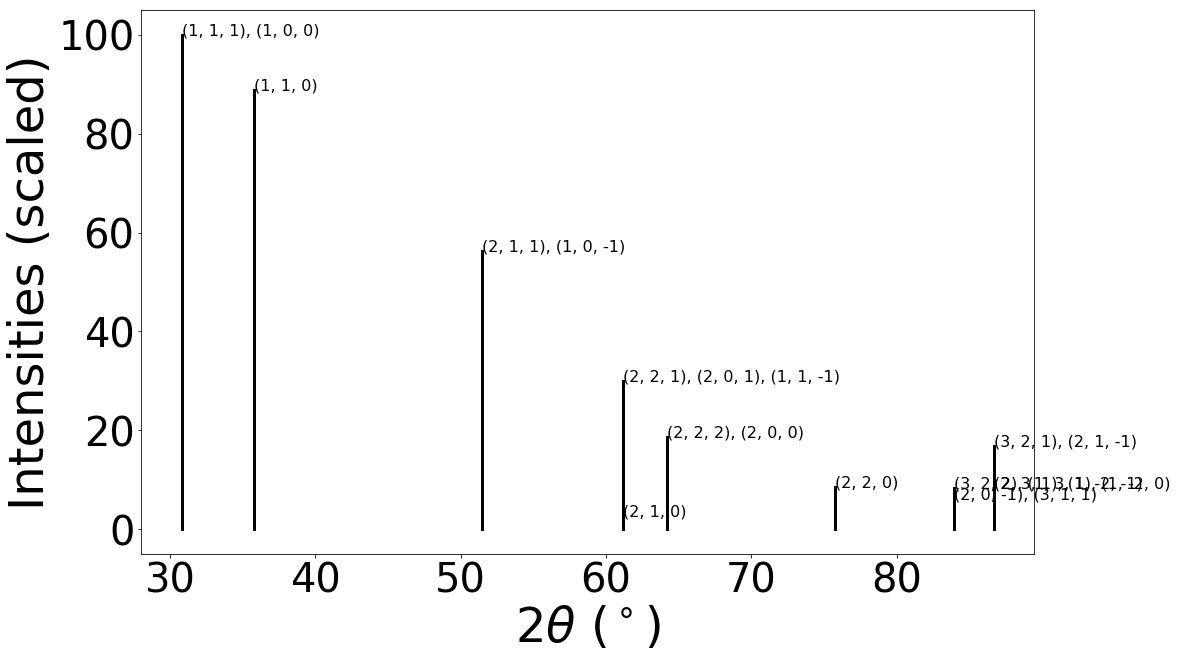

In [52]:
xrdc.get_plot(lis_structures[0])  # let's examine each in turn, starting with the first (0)

In [ ]:
for structure in lis_structures:
    xrdc.get_plot(structure)

# 6. Example: Creating a surface

Here, we show how to generate all of the low-index facets for BCC Fe.

In [54]:
from pymatgen.core.surface import generate_all_slabs

In [55]:
slabs = generate_all_slabs(bcc_fe, 1, 4, 10)

In [56]:
first_slab = slabs[0]
print(first_slab)

Slab Summary (Fe6)
Reduced Formula: Fe
Miller index: (1, 1, 1)
Shift: 0.2500, Scale Factor: [[-1  1  0]
 [-1  0  1]
 [ 1  0  0]]
abc   :   3.959798   3.959798  28.000000
angles: 135.000000 135.000000  60.000000
Sites (6)
1 Fe     0.000000     0.000000     0.075000
2 Fe     0.500000     0.500000     0.025000
3 Fe     0.000000     0.000000     0.175000
4 Fe     0.500000     0.500000     0.125000
5 Fe     0.000000     0.000000     0.275000
6 Fe     0.500000     0.500000     0.225000


In [57]:
for slab in slabs:
    print(slab.miller_index)

(1, 1, 1)
(1, 1, 0)
(1, 0, 0)


# Summary

This notebook is intended to provide a short introduction to some of the functionality of pymatgen. We've examined the building blocks of pymatgen: the `Structure` and `Molecule` objects, and the `Lattice`, `Element`, `Specie` and `Composition` objects used to make them. We have also seen some simple examples of pymatgen's analysis capabilities.